## MLR Model#1

- [BACK TO TEST DATASET - Clean file](SamayShah_Project2(TEST)_DataCleaning_Test_Dataset.ipynb)
- [BACK TO TRAIN DATASET - Clean file](SamayShah_Project2(Main_TRAIN)_DataCleaning_Train_Dataset.ipynb)
- [TRAIN USING MODEL#4 (MAIN)](SamayShah_MODEL%234__FINAL_MODEL__.ipynb)

In [1]:
## Import useful libraries here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy import stats

## For additional testing
from sklearn.linear_model import LassoCV, RidgeCV

%matplotlib inline

In [2]:
## Import original dataframe with all clean data - good to have than later look for it.

originaldf = pd.read_csv('datasets/v3_clean_nooutliers.csv')

In [3]:
## Import our dataset for model#1

df1 = pd.read_csv('datasets/model1_basic.csv')

In [4]:
## Selected Features needed for this Model#1

## Forward Selection Approach for Linear Regression Model
## Also used Penalized Regression Models: Ridge & Lasso towards the end

inputcols = ['Lot Area', 'Total Bsmt SF', 'Bedroom AbvGr', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Foundation_PConc',
       'Foundation_Slab', 'Sale Type_Contract', 'Sale Type_New Home',
       'Sale Type_WarrantyDeed', 'proximity_to_far', 'proximity_to_veryClose',
       'Density_Low', 'Density_MedHigh', 'Density_MedLow', 'Density_veryLow',
       'Bldg_type_Single', 'Bldg_type_TownHouse', 'House_style_1_story',
       'House_style_2&2.5_story', 'House_style_Splitlevel',
       'house_age_Contemporary', 'house_age_Medieval', 'house_age_Stone-age']


### Multiple Linear Regression

In [5]:
## Targets -> For this model - 'Lot Area', 'Total Bsmt SF', 'Bedroom AbvGr' + about 7 dummy variables
targets1 = df1['log_SalePrice']

## Inputs - > everything except the target
inputs1 = df1[inputcols]

## Final Test dataset
tinput = df1[inputcols]

In [6]:
Input = sm.add_constant(inputs1)
results = sm.OLS(targets1,inputs1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     200.8
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:55:34   Log-Likelihood:                 755.86
No. Observations:                1972   AIC:                            -1420.
Df Residuals:                    1926   BIC:                            -1163.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Lot Area                 2.023e-05   1.57e-06     12.895      0.000    1.72e-05    2.33e-05
Total Bsmt SF               0.0004   1.46e-05     28.760      0.000       0.000       0.000
Bedroom AbvGr               0.0122      0.006      1.986      0.047       0.000       0.024
Neighborhood_Blueste        1.4567      0.068     21.290      0.000       1.323       1.591
Neighborhood_BrDale        -0.2786      0.057     -4.892      0.000      -0.390      -0.167
Neighborhood_BrkSide        1.5953      0.021     75.167      0.000       1.554       1.637
Neighborhood_ClearCr       -0.0575      0.058     -0.993      0.321      -0.171       0.056
Neighborhood_CollgCr       11.0821      0.048    229.745      0.000      10.987      11.177
Neighborhood_Crawfor        1.8057      0.021     85.538      0.000       1.764       1.847
Neighborhood_Edwards        1.7154      0.017    103.697      0.000       1.683       1.748
Neighborhood_Gilbert        1.7916      0.018     97.637      0.000       1.756       1.828
Neighborhood_Greens         1.7384      0.089     19.474      0.000       1.563       1.914
Neighborhood_GrnHill        2.1135      0.107     19.832      0.000       1.904       2.322
Neighborhood_IDOTRR         1.3619      0.021     64.067      0.000       1.320       1.404
Neighborhood_Landmrk        1.2898      0.146      8.836      0.000       1.004       1.576
Neighborhood_MeadowV       -0.3561      0.053     -6.659      0.000      -0.461      -0.251
Neighborhood_Mitchel        1.5507      0.020     77.436      0.000       1.511       1.590
Neighborhood_NAmes         11.0750      0.045    247.082      0.000      10.987      11.163
Neighborhood_NPkVill        1.4789      0.051     28.942      0.000       1.379       1.579
Neighborhood_NWAmes         1.6413      0.020     81.848      0.000       1.602       1.681
Neighborhood_NoRidge        0.0757      0.049      1.553      0.120      -0.020       0.171
Neighborhood_NridgHt        2.0272      0.020    100.214      0.000       1.988       2.067
Neighborhood_OldTown       11.0248      0.047    233.583      0.000      10.932      11.117
Neighborhood_SWISU         -0.1484      0.053     -2.825      0.005      -0.251      -0.045
Neighborhood_Sawyer         1.7988      0.019     95.687      0.000       1.762       1.836
Neighborhood_SawyerW        1.5595      0.021     74.103      0.000       1.518       1.601
Neighborhood_Somerst        1.9250      0.018    109.343      0.000       1.890       1.960
Neighborhood_StoneBr        0.1380      0.047      2.965      0.003       0.047       0.229
Neighborhood_Timber        -0.0570      0.046     -1.235      0.217      -0.148       0.034
Neighborhood_Veenker        1.6155      0.053     30.340      0.000       1.511       1.720
Foundation_PConc            0.0433      0.014  

### Train Test Split

In [7]:
## After some trial-and-error, I finalized 60-40 split, it's always better to test on a bigger set!

x_train, x_test, y_train, y_test = train_test_split(inputs1, targets1, test_size=0.2, random_state=365)

### Scale the data

In [8]:
## Create standard scaler object

scaler1 = StandardScaler()

In [9]:
## Fit and Transform using mean and SD feature-wise for input training data and
## scale the test input for training data using same mean and SD.

x_train_scaled = scaler1.fit_transform(x_train)
x_test_scaled = scaler1.transform(x_test)

### Create Regression

In [10]:
## Create Linear Regression object

reg1 = LinearRegression()
reg1.fit(x_train_scaled,y_train)

LinearRegression()

In [11]:
## Predicted outputs for train set

y_hat = reg1.predict(x_train_scaled)

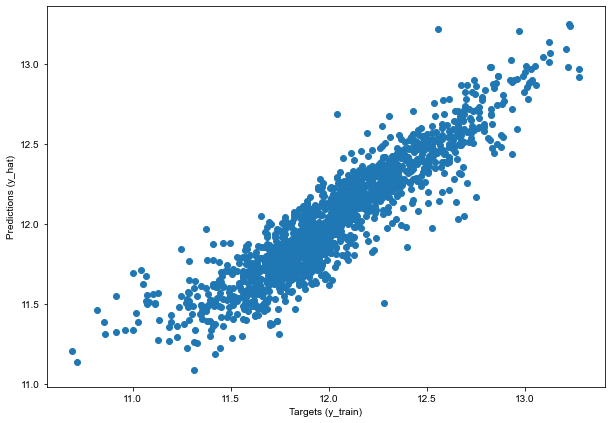

In [12]:
## Compare the targets and predictions for 'Train' set - scatterplot

plt.figure(figsize=(10,7))
plt.scatter(y_train,y_hat)
sns.set(font_scale=1.4)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)');

## More values on the lower side => model predicts lower values as price increases

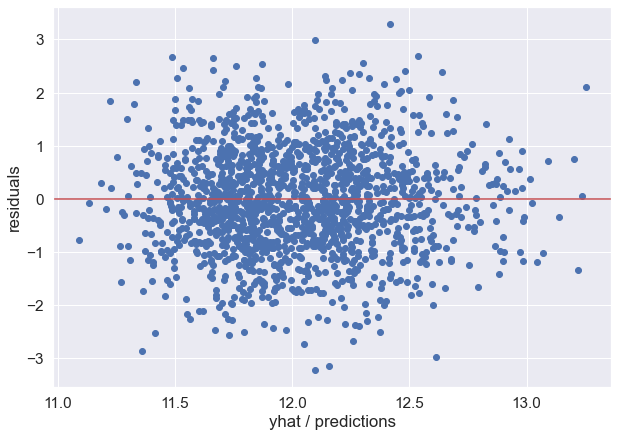

In [13]:
## Residual Error Plot

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
plt.scatter(y_hat,np.random.randn(len(y_hat)))
plt.axhline(0,color='r')
plt.xlabel('yhat / predictions')
plt.ylabel('residuals');

##Data is evenly distibuted, we do not have any random error! 
## Homoscedacity = I see consistent variance on both sides of the line

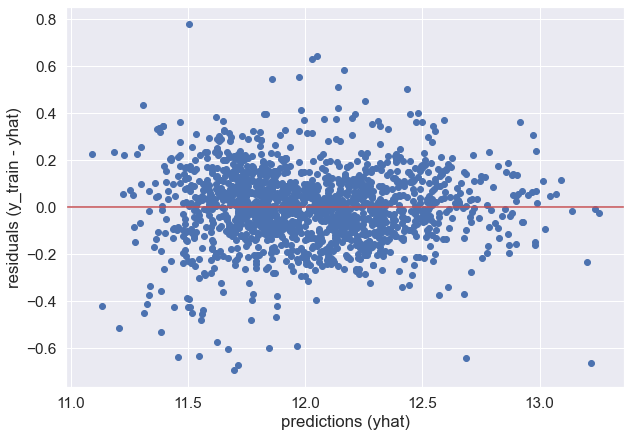

In [14]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
plt.scatter(y_hat,(y_train-y_hat))
plt.axhline(0,color='r')
plt.xlabel('predictions (yhat)')
plt.ylabel('residuals (y_train - yhat)');

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


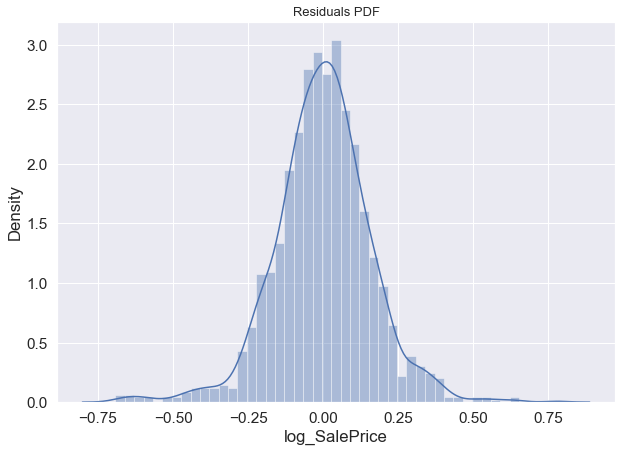

In [15]:
## Residual distribution - to check for anomalies

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.distplot(y_train-y_hat)
plt.title('Residuals PDF',size=13);

##### ~Normally distributed!
## ## More positive values in the above plot - indicates y_train > y_hat 
## i.e. targets > predictions (lower predictions)

### Evaluating this model - train set

In [16]:
reg1.score(x_train_scaled,y_train)

0.8347030377828972

In [17]:
## To calculate R2_adj later
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [18]:
## Calculate all major metrics

def lord_of_the_metrics(y_true, y_pred, p):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
    print('Median absolute error   = ', mae)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)

In [19]:
lord_of_the_metrics(y_train, y_hat, inputs1.shape[1])

Mean squared error      =  0.025621395517945015
Root mean squared error =  0.16006684702943647
Median absolute error   =  0.09194448971733848
R^2                     =  0.8347030377828972
Adjusted R^2            =  0.8293988130621126


In [20]:
cross_val_score(reg1,x_train,y_train,cv=10).mean()

0.8209357518873561

In [21]:
## So Model#1 train set gives R2 score of 0.84 and Adj_R2 score of 0.83 and mean cross_val_score of 0.82

**Training RMSE = 0.15819979551379837**

### Finding Coefs & Intercept

In [22]:
## y-intercept: If all the features were 0, the min price for a house would still be $171,276

reg1.intercept_

12.021001122315255

In [23]:
## Weights for different features, tells us how important that feature is.

reg1.coef_

array([ 6.95773607e-02,  1.78063127e-01,  1.11840506e-02, -1.37182865e+11,
       -2.94539390e-02,  4.23767201e+10, -9.33834131e-03, -1.68857667e+10,
        4.12871542e+10,  6.28411234e+10,  5.79655716e+10, -9.70337236e+10,
       -1.37182865e+11,  3.86067073e+10, -9.70337236e+10, -4.35333252e-02,
        4.20171643e+10, -2.14014893e+10, -3.74137065e+11,  4.64401201e+10,
        4.11987305e-03,  5.85666691e+10, -1.63325427e+10, -2.49633789e-02,
        5.91599620e+10,  4.54644894e+10,  6.25680548e+10,  1.77345276e-02,
       -1.62763596e-02, -3.20801812e+11,  1.63440704e-02,  3.34701538e-02,
        1.40256882e-02,  4.77008820e-02,  3.92456055e-02,  9.43183899e-03,
       -1.27677917e-02, -1.93077785e+10, -1.42946334e+11, -1.18816356e+11,
        5.35136340e+11,  4.57458496e-02,  3.23162079e-02, -7.69290924e-02,
        4.26235199e-02,  9.03415680e-03,  9.42039490e-02,  4.82406616e-02,
       -4.00886536e-02])

In [24]:
## reg1 summary
reg1_summary = pd.DataFrame(inputs1.columns.values, columns=['Features'])
reg1_summary['Coefficients'] = reg1.coef_
reg1_summary

,Features,Coefficients
0,Lot Area,6.957736e-02
1,Total Bsmt SF,1.780631e-01
2,Bedroom AbvGr,1.118405e-02
3,Neighborhood_Blueste,-1.371829e+11
4,Neighborhood_BrDale,-2.945394e-02
5,Neighborhood_BrkSide,4.237672e+10
6,Neighborhood_ClearCr,-9.338341e-03
7,Neighborhood_CollgCr,-1.688577e+10
8,Neighborhood_Crawfor,4.128715e+10
9,Neighborhood_Edwards,6.284112e+10


In [25]:
originaldf['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [26]:
## Neighbourhood 'ClearCr' is most imp. while 'Gilbert' and 'Somerst' are negatively correlated

In [27]:
## Sale Type = New Home has maximum correlation with prices too

In [28]:
## Single, Medieval House, 2-2.5 Story - carry more weights compared to others in that category

### Test-1

In [29]:
## Predict outputs for Test set

y_pred = reg1.predict(x_test_scaled)

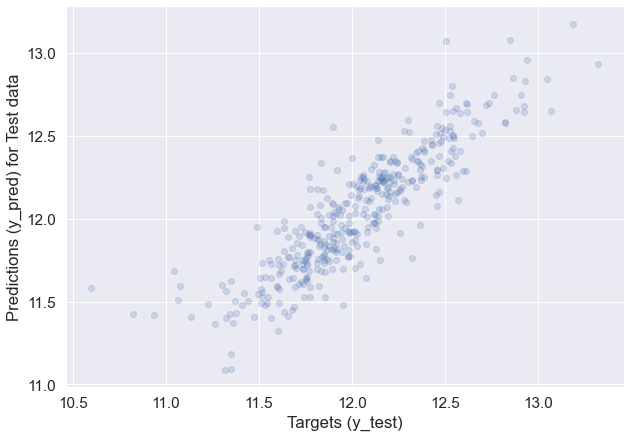

In [30]:
## Compare the targets and predictions for 'Test' set - scatterplot

plt.figure(figsize=(10,7))
plt.scatter(y_test,y_pred,alpha=0.2)
sns.set(font_scale=1.4)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_pred) for Test data');

## More values on the lower side => model predicts lower values as price increases

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


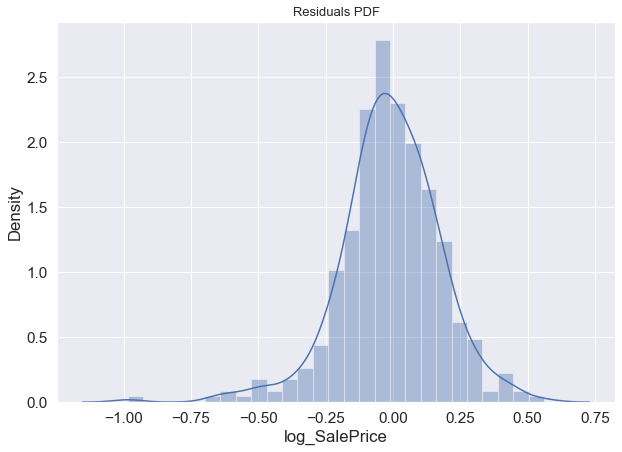

In [31]:
## Residual distribution - to check for anomalies

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.distplot(y_test-y_pred)
plt.title('Residuals PDF',size=13);

##### ~Normally distributed!
## ## More positive values in the above plot - indicates y_train > y_hat 
## i.e. targets > predictions (lower predictions)

In [32]:
## Lets check all metrics for our Test data

lord_of_the_metrics(y_test, y_pred, inputs1.shape[1])

Mean squared error      =  0.03471303152578069
Root mean squared error =  0.18631433526645416
Median absolute error   =  0.10860027308996756
R^2                     =  0.774806947593684
Adjusted R^2            =  0.7428230068171348


In [33]:
cross_val_score(reg1,x_test_scaled,y_test,cv=10).mean()

-2.9881677838875836e+23

In [34]:
## So Model#1 Train set gives R2 score of 0.84 and Adj_R2 score of 0.83 and mean cross_val_score of 0.82

In [35]:
# For Model#1 Test: set gives R2 score of 0.78 and Adj_R2 score of 0.77 and mean cross_val_score of 0.79

In [36]:
##Because our training performance is better than our testing performance, it's likely that our model is overfit
## (and thus too complex). We should consider regularizing.

In [37]:
from sklearn.linear_model import RidgeCV

In [38]:
## List of Ridge alphas to check - inverse of our lambda (Penalizes coefficient)
## Bigger the alpha lesser the overfit

# Cross-validate over our list of ridge alphas.
ridge_model = RidgeCV(alphas=(10,20,30,40,50,100,200), scoring='r2',cv=5)

# Fit model using best ridge alpha!
ridge_model.fit(x_train_scaled, y_train) 

## Get the optimal value
ridge_model.alpha_

20

In [39]:
print(ridge_model.score(x_train_scaled,y_train))
print(ridge_model.score(x_test_scaled,y_test))

## no significant difference - compared to r2 score for linear regression
## Dropped down the R2 for Train a little bit and increased the R2 for test

0.834485249176931
0.7765810047088355


In [40]:
## Lasso

In [41]:
from sklearn.linear_model import LassoCV

In [42]:
## List of Lasso alphas to check - inverse of our lambda (Penalizes coefficient)
## Bigger the alpha lesser the overfit

l_alphas = np.linspace(.1,10,100) ## generates 100 values
l_alphas

# Cross-validate over our list of ridge alphas.
lasso_model = LassoCV(alphas=l_alphas,cv=5)
lasso_model2 = LassoCV(alphas=(0.01,0.02,0.03),cv=5)   ## Drops significantly as the number drops

# Fit model using best ridge alpha!
lasso_model.fit(x_train_scaled, y_train) 
lasso_model2.fit(x_train_scaled, y_train) 

## Get the optimal value
print("Lasso Model Alpha ",lasso_model.alpha_)
print("Lasso Model2 Alpha ",lasso_model2.alpha_)

Lasso Model Alpha  0.1
Lasso Model2 Alpha  0.01


In [43]:
print(lasso_model.score(x_train_scaled,y_train))
print(lasso_model.score(x_test_scaled,y_test))

## Significant Difference
## This is not what I would want but, it good demonstration of how it penalized the coefficients (zero's)

0.5154228202035844
0.48844218316243704


In [44]:
print(lasso_model2.score(x_train_scaled,y_train))
print(lasso_model2.score(x_test_scaled,y_test))

## significant difference
## Our results got better from train: 0.83 and Test:0.77 (overfit) to the following

0.8129567728302759
0.7619687313752818


In [45]:
## Lets plot lasso#1 - in order to see the penalty on coefficients - almost dropeed to 0

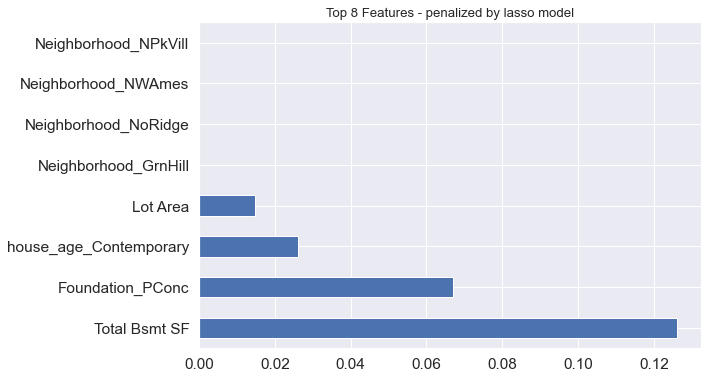

In [46]:
pd.Series(lasso_model.coef_,index=inputs1.columns.values).sort_values(ascending=False).head(8).plot.barh(figsize=(9,6))
sns.set(font_scale=1.1)
plt.title('Top 8 Features - penalized by lasso model');

In [47]:
inputs1.columns

Index(['Lot Area', 'Total Bsmt SF', 'Bedroom AbvGr', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Foundation_PConc',
       'Foundation_Slab', 'Sale Type_Contract', 'Sale Type_New Home',
       'Sale Type_WarrantyDeed', 'proximity_to_far', 'proximity_to_veryClose',
       'Density_Low', 'Density_MedHigh', 'Density_MedLow', 'Density_veryLow',

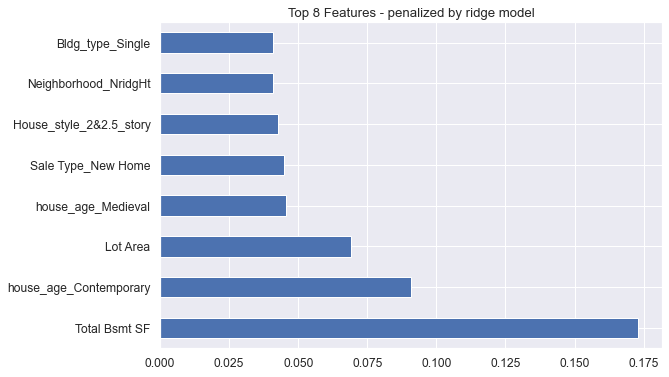

In [48]:
pd.Series(ridge_model.coef_,index=inputs1.columns.values).sort_values(ascending=False).head(8).plot.barh(figsize=(9,6))
sns.set(font_scale=1.1)
plt.title('Top 8 Features - penalized by ridge model');

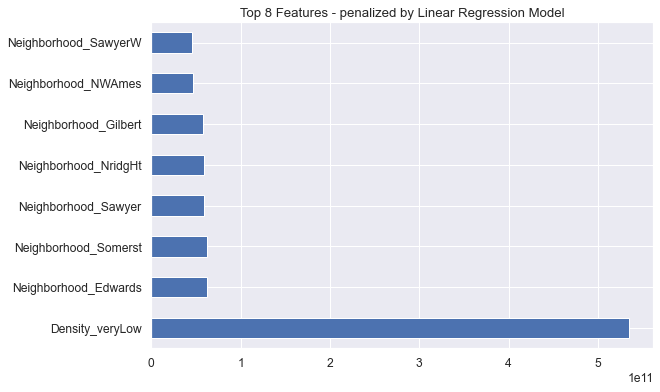

In [49]:
pd.Series(reg1.coef_,index=inputs1.columns.values).sort_values(ascending=False).head(8).plot.barh(figsize=(9,6))
sns.set(font_scale=1.1)
plt.title('Top 8 Features - penalized by Linear Regression Model');

### As this is not the best model will try Model#2 will some more dummy features 

#### Under Separate File

In [50]:
## Thankyou

- [Back TO TOP](#MLR-Model#1)